In [1]:
# Decision Tree Regression
# Uses ensembles

# Regression template:-
# Contains stuff pretty much required for later building of models

# Data Preprocessing:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Separating into dependent and independent variables
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [2]:
'''# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
'''

'''# Feature Scaling:-
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
'''

'# Feature Scaling:-\nfrom sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nx_train = sc_x.fit_transform(x_train)\nx_test = sc_x.transform(x_test)\n'

In [15]:
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, criterion = 'mse', random_state = 0)
# n_estimators -> number of decision trees in the forest, by default 10
# criterion -> Mean squared error, takes the sum of squares of the errors between predictions and actual values and finds mean
#              Can be other criterion too, will be discovered later. mse by default

# We can play around with 'n_estimators' to make more precise decisions and consequently find which one is the best
# We try with n_estimators = 10 initially then 100 and then 300

regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

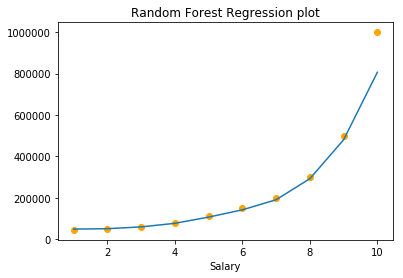

In [16]:
# Visualising the Regression results

y_pred = regressor.predict(x)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('Random Forest Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

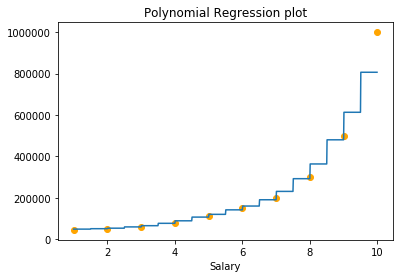

In [17]:
# Visualising the Regression results (for higher resolution and smoother curve)

# Last time we had only 1 decision tree and now we have 10 which could possibly improve the results
# Here we wil supposedly have more discontinuities leading to more accurate means of 'y' leading to better predictions of 'y'

x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))

y_pred = regressor.predict(x_grid)
plt.scatter(x, y, color = 'orange')
plt.plot(x_grid, y_pred)
plt.title('Polynomial Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# Each jump discontinuty corresponds to the average of all the predictions made by each of the 'n' trees of the forest
# Increasing 'n' doesnt guarantee more number of discontinuities, i.e, number of steps in the graph remains the same
# Increasing 'n' guarantees a better average value of 'y' making the predictions more precise

In [18]:
# Predicting new result with a new input
y_pred = regressor.predict([[6.5]])
y_pred

# When we predict this, actually we receive 'n' predictions from 'n' different trees and the average gives us this result
# With increasing number of trees in forest we get more accurate results. This is more like wisdom of crowd

array([160333.33333333])

In [ ]:
# This is basically one of the best prediction methods
# Here there are 'n' number of same models to make a predictions
# Later we will combine different machine learning models to get even better predictions